# Exploratory Data Analysis

* Cleaning data by renaming columns, removing unnecessary data, and making sure there is no damaged data (special characters)
* Applying one-hot-encoding to the categorical features of the data set
* Implementing feature engineering to extrapolate data from existing relationships

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt

In [2]:
# Import data from csv files

train = pd.read_csv(r'~/desktop/COMP551/COMP551-p1/Adult/adult.csv')
test = pd.read_csv(r'~/desktop/COMP551/COMP551-p1/Adult/adult-test.csv')

all_data = pd.concat([train, test], axis=0, sort=False)

train

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Observe columns
train.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [4]:
# Renaming columns to appropriate names from the dataset description
train.rename(columns = {" United-States": "Native Country",
                        " 40": "Hours Per Week",
                        " 0": "Capital Loss",
                        " 2174": "Capital Gain",
                        " Male": "Sex",
                        " White": "Race",
                        " Not-in-family": "Relationship",
                        " Adm-clerical": "Occupation",
                        " Never-married": "Marital Status",
                        " 13": "Education Years",
                        " Bachelors": "Education Level",
                        " State-gov": "Workclass",
                        "39": "Age"}, inplace=True)

In [5]:
# Removing this feature because data is incomprehensible
train.drop(" 77516", axis=1, inplace=True)

In [6]:
train.columns

Index(['Age', 'Workclass', 'Education Level', 'Education Years',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country',
       ' <=50K'],
      dtype='object')

In [7]:
# Transpose of training data statistics for easier viewability
print("Training data shape: ", train.shape)
train.describe().T

Training data shape:  (32560, 14)


,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Education Years,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital Gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital Loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours Per Week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [8]:
# Understanding numerical and categorical feature counts
num_data = [c for c in train.columns if train[c].dtype !='O']
cat_data = [w for w in train.columns if train[w].dtype == 'O']

print("Numerical Feature count: ", len(num_data))
num_data

Numerical Feature count:  5


['Age', 'Education Years', 'Capital Gain', 'Capital Loss', 'Hours Per Week']

In [9]:
print("Categorical Feature count: ", len(cat_data))
cat_data

Categorical Feature count:  9


['Workclass',
 'Education Level',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native Country',
 ' <=50K']

In [10]:
# null values in data
nullCounter = train.isna().sum().sort_values(ascending=False)/len(train)

nullCounter

Age                0.0
Workclass          0.0
Education Level    0.0
Education Years    0.0
Marital Status     0.0
Occupation         0.0
Relationship       0.0
Race               0.0
Sex                0.0
Capital Gain       0.0
Capital Loss       0.0
Hours Per Week     0.0
Native Country     0.0
 <=50K             0.0
dtype: float64

In [11]:
train

,Age,Workclass,Education Level,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,<=50K
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
zeroCount1 = 0
zeroCount2 = 0
for x, y in zip(train["Capital Loss"],train["Capital Gain"]):
    if x == 0:
        zeroCount1 += 1
    if y == 0:
        zeroCount2 += 1

print(zeroCount1, zeroCount2)

31041 29849


In [13]:
train.drop("Capital Loss", axis=1, inplace=True)

In [14]:
train.drop("Capital Gain", axis=1, inplace=True)

In [15]:
train.columns

Index(['Age', 'Workclass', 'Education Level', 'Education Years',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours Per Week', 'Native Country', ' <=50K'],
      dtype='object')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32560 non-null  int64 
 1   Workclass        32560 non-null  object
 2   Education Level  32560 non-null  object
 3   Education Years  32560 non-null  int64 
 4   Marital Status   32560 non-null  object
 5   Occupation       32560 non-null  object
 6   Relationship     32560 non-null  object
 7   Race             32560 non-null  object
 8   Sex              32560 non-null  object
 9   Hours Per Week   32560 non-null  int64 
 10  Native Country   32560 non-null  object
 11   <=50K           32560 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [17]:
# Now the data below does not have any null values nor does it have irrelevant or incomprehensible features
train

,Age,Workclass,Education Level,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Hours Per Week,Native Country,<=50K
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [18]:
# The next thing is to look for special characters in the data which may indicate damaged data
train.isin(['?']).sum()

Age                0
Workclass          0
Education Level    0
Education Years    0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Hours Per Week     0
Native Country     0
 <=50K             0
dtype: int64

## Note 1 - One hot encoding

Now, the training data set has been cleaned relatively well. The next step is to include some feature engineering and make sure the test data is in the same format as the cleaned training data set to ensure the same input space compatibility. However, before moving on to the feature engineering, we must apply one-hot-encoding to the categorical data in the data set.

In [19]:
# One hot encoding categorical features
ohe = OneHotEncoder(sparse=False)
ohe_arr = ohe.fit_transform(train)
encoded = pd.DataFrame(data=ohe_arr, columns=ohe.get_feature_names())

encoded

,x0_17,x0_18,x0_19,x0_20,x0_21,x0_22,x0_23,x0_24,x0_25,x0_26,...,x10_ Scotland,x10_ South,x10_ Taiwan,x10_ Thailand,x10_ Trinadad&Tobago,x10_ United-States,x10_ Vietnam,x10_ Yugoslavia,x11_ <=50K,x11_ >50K
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32558,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


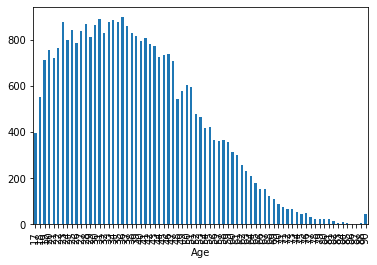

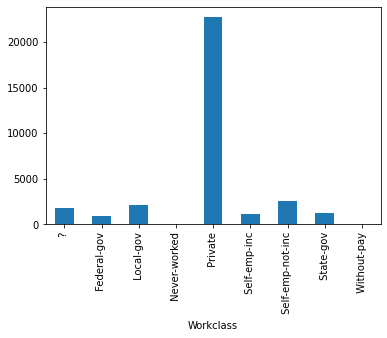

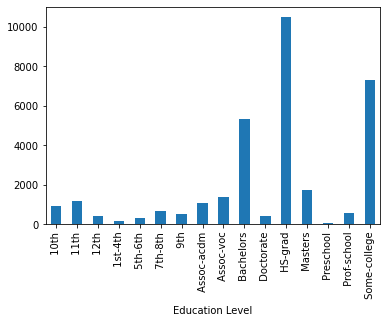

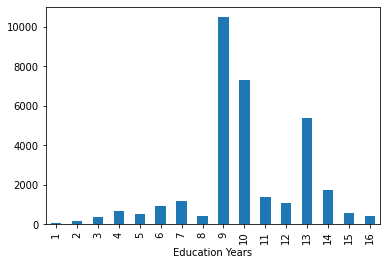

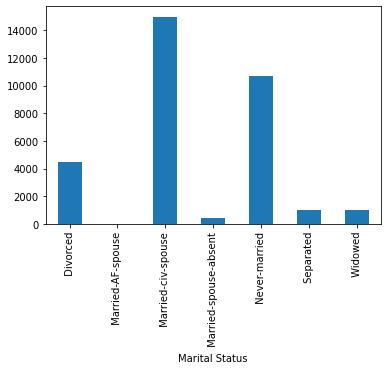

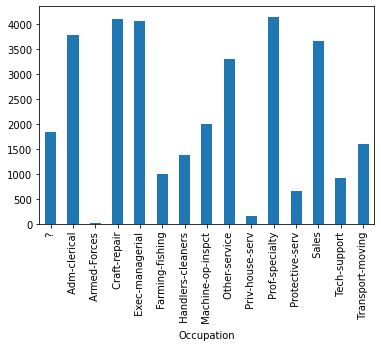

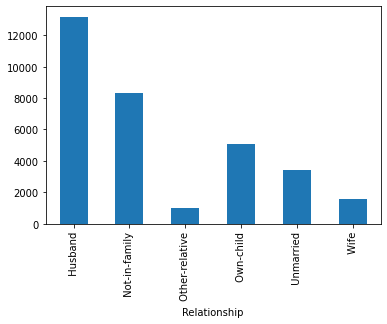

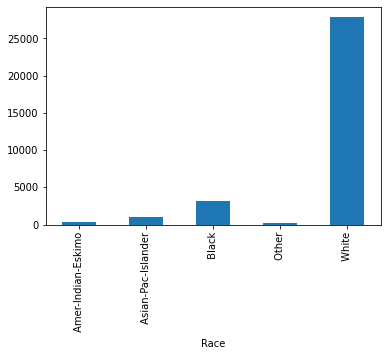

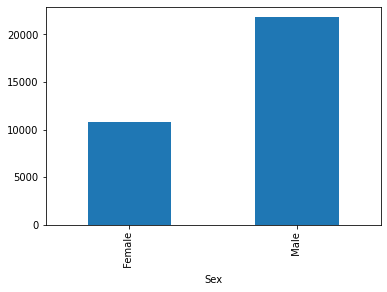

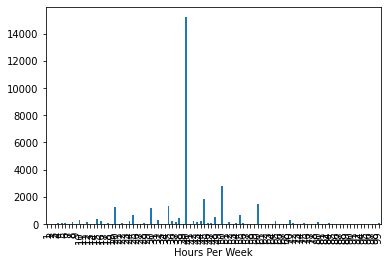

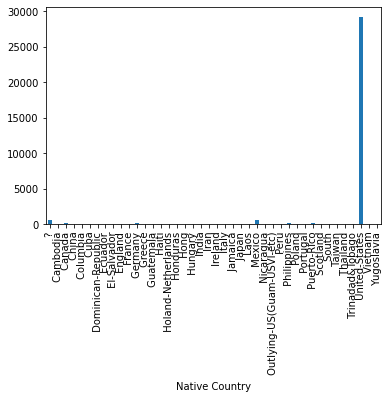

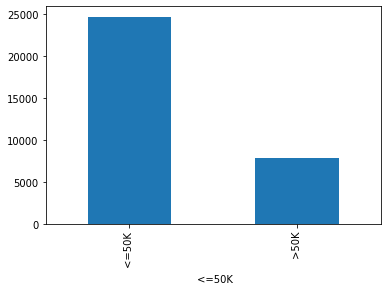

In [22]:
# Distributions of values in categorical features
for col in train.columns:
    plt.figure()
    train.groupby(by=col).size().plot.bar()

## Note 2 - Feature Engineering